In [7]:
import os

from torch_geometric.data import Data

from graph_utils import *
from gmn_utils import *
from configure_cosine import *
from visualize import *

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

config = get_default_config()

torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True
torch.autograd.set_detect_anomaly(True)

gmn, optimizer = build_model(config, 64, 4)
gmn.load_state_dict(torch.load("models/model64_5_50.pth"))
gmn.to(device)
gmn.eval()

GraphMatchingNet(
  (_encoder): GraphEncoder(
    (MLP1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
    )
    (MLP2): Sequential(
      (0): Linear(in_features=4, out_features=4, bias=True)
    )
  )
  (_aggregator): GraphAggregator(
    (MLP1): Sequential(
      (0): Linear(in_features=64, out_features=256, bias=True)
    )
    (MLP2): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (_prop_layers): ModuleList(
    (0-4): 5 x GraphPropMatchingLayer(
      (_message_net): Sequential(
        (0): Linear(in_features=132, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (_reverse_message_net): Sequential(
        (0): Linear(in_features=132, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
      (GRU): GRU(192, 64)
    )
  )
)

In [8]:
original_data = torch.load("original_data.pt")
clustered_data = torch.load("clustered_data.pt")

In [9]:
sim = similarity(gmn, config, original_data, original_data)
print(sim)

tensor(1., grad_fn=<SelectBackward0>)


In [10]:
cross_attentions = torch.load("topk_cross_attentions.pt")
top_values_x, top_indices_x, top_values_y, top_indices_y = cross_attentions[0][0]

In [11]:
print(len(top_indices_x))

2708


KeyError: 2495

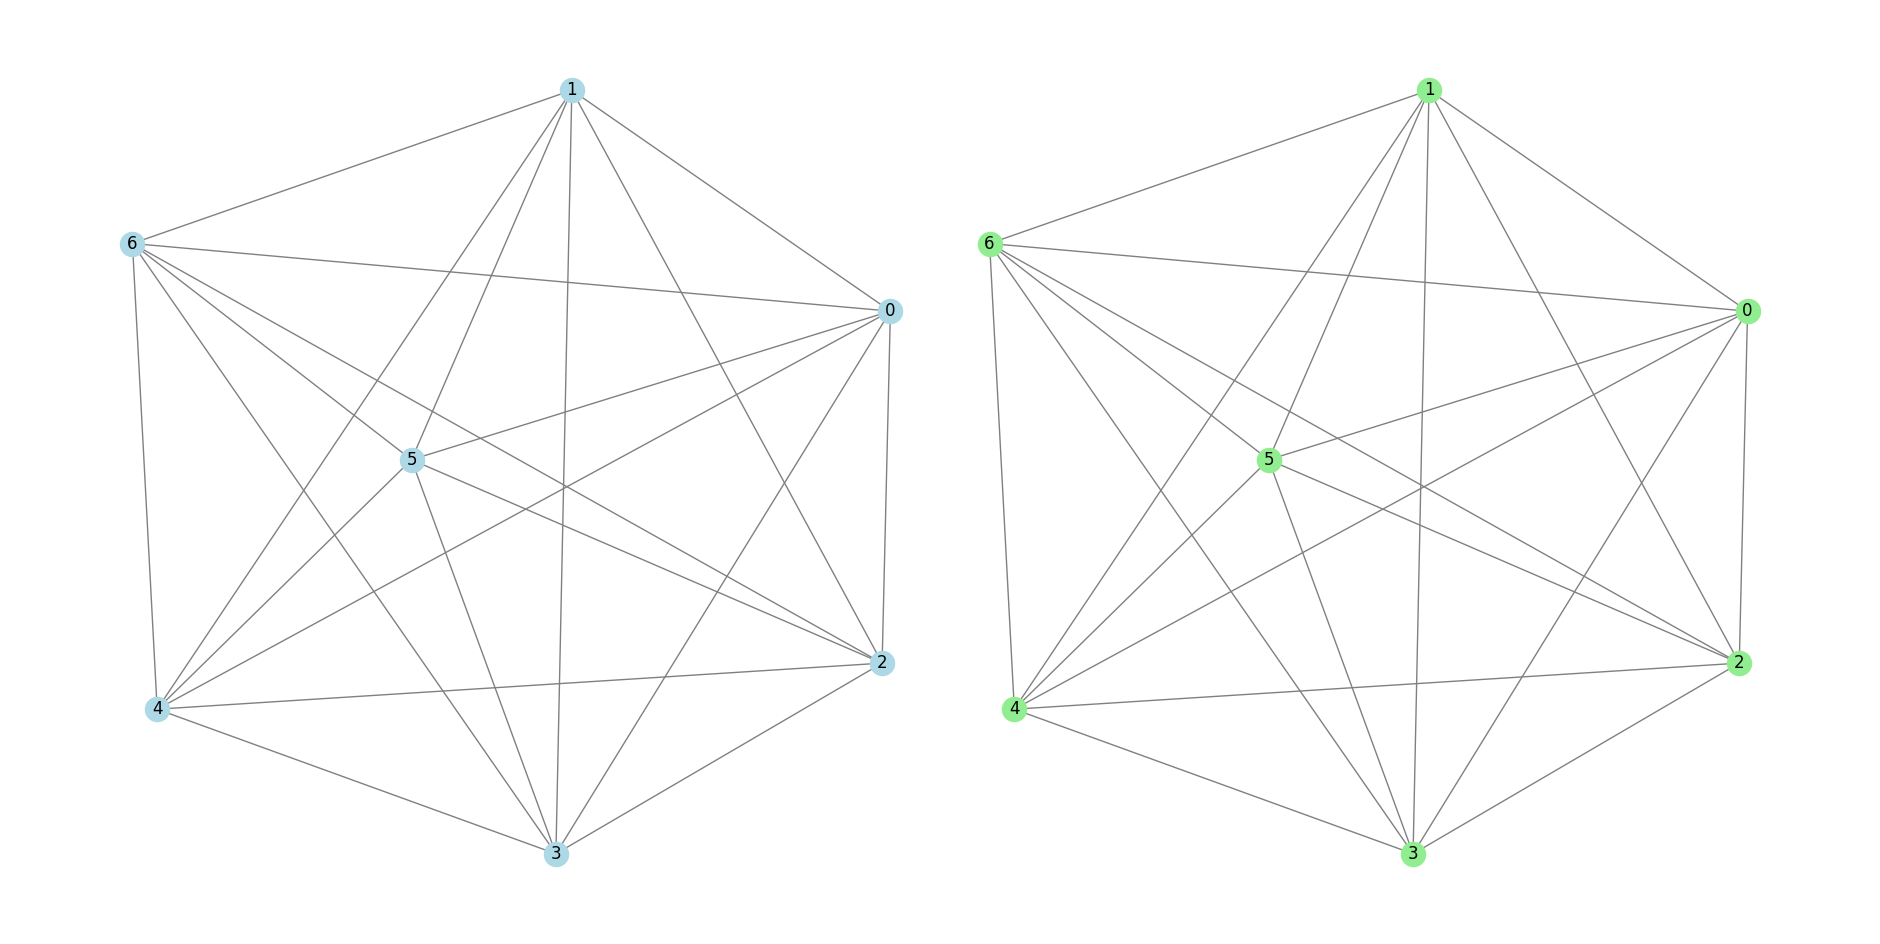

In [12]:
visualize_attention(clustered_data, top_indices_x, top_values_x, top_indices_y, top_values_y)